In [1]:
%load_ext autoreload
%autoreload 3
from sspredict.make_prediction.single_calc_wrapper import single_calc_strength

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import rc, font_manager
ticks_font = font_manager.FontProperties(family='serif', style='normal',
                                         size=24, weight='normal', stretch='normal')

In [216]:
# initiation
single_calc = single_calc_strength()

In [217]:
# available models 
single_calc.ssmodels_all

['FCC_Varvenne-Curtin-2016',
 'BCC_edge_Maresca-Curtin-2019',
 'BCC_screw_Maresca-Curtin-2019',
 'BCC_screw_Suzuki_RWASM-2020']

In [218]:
# prepare a json file with data
filein='../sspredict/sample_elements_data.json'

In [219]:
print('Example 1')
# specify model to use
single_calc.use_model('FCC_Varvenne-Curtin-2016')

# 3d TM CrFeCoNi
comp_example1 = {'Co':25,'Fe':25,'Ni':25,'Mn':25}
# setup the system
single_calc.set_comp(comp_example1)
# specify the adjustable parameters for the model 
single_calc.set_adjustables(f1=0.35, 
                            f2=5.7, 
                            alpha=1/16)

# if not specified, adjustables have default values: 
# single_calc.set_adjustables()

# specify experimental conditions
temperature = np.arange(0,600,100)
strain_r = 0.001
single_calc.set_temp(temperature)
single_calc.set_strain_r(strain_r)
single_calc.exp_conditions()

# get data from user input
single_calc.grab_data(filein)
#print(single_calc.data_of_ssmodels)

# next make prediction
single_calc.calculate()
# if don't want to use model, remove it by
single_calc.remove_model('FCC_Varvenne-Curtin-2016')
single_calc.reorganize_data()
single_calc.pretty_calc_data


Example 1
Currently using model(s): ['FCC_Varvenne-Curtin-2016']
Alloy system: Co: 0.25 Fe: 0.25 Ni: 0.25 Mn: 0.25 
Setting adjustable parameters of the model FCC_Varvenne-Curtin-2016.
{'f1': 0.35, 'f2': 5.7, 'alpha': 0.0625}
Temperature: [  0 100 200 300 400 500]
Strain rate: 0.001
grab elemental data for prediction.
reading datafile ../sspredict/sample_elements_data.json.
Setting elemental data of the model FCC_Varvenne-Curtin-2016.
Preparing Calculation -> FCC_Varvenne-Curtin-2016.
Done Calculation. -> FCC_Varvenne-Curtin-2016.
removing FCC_Varvenne-Curtin-2016 from the model set.
Currently using model(s): [].


,Co,Fe,Ni,Mn,T,tau_y,structure,model
0,25.0,25.0,25.0,25.0,0.0,126.10,fcc,FCC_Varvenne-Curtin-2016
1,25.0,25.0,25.0,25.0,100.0,91.42,fcc,FCC_Varvenne-Curtin-2016
2,25.0,25.0,25.0,25.0,200.0,71.06,fcc,FCC_Varvenne-Curtin-2016
3,25.0,25.0,25.0,25.0,300.0,57.43,fcc,FCC_Varvenne-Curtin-2016
4,25.0,25.0,25.0,25.0,400.0,44.18,fcc,FCC_Varvenne-Curtin-2016
5,25.0,25.0,25.0,25.0,500.0,33.99,fcc,FCC_Varvenne-Curtin-2016


In [220]:
print('Example 2')
# specify model to use
single_calc.use_model('BCC_edge_Maresca-Curtin-2019')

# specify the adjustable parameters for the model 
single_calc.set_adjustables(f1=0.35, 
                            f2=5.7, 
                            alpha=1/12)
# BCC refractory MoWNbZr
comp_example2 = {'Mo':25,'W':25,'Nb':25,'Zr':25}
# setup the system
single_calc.set_comp(comp_example2)
single_calc.grab_data(filein)

single_calc.calculate()

# if don't want to use model, remove it by
single_calc.remove_model('BCC_edge_Maresca-Curtin-2019')

single_calc.reorganize_data()
single_calc.pretty_calc_data

Example 2
Currently using model(s): ['BCC_edge_Maresca-Curtin-2019']
Setting adjustable parameters of the model BCC_edge_Maresca-Curtin-2019.
{'f1': 0.35, 'f2': 5.7, 'alpha': 0.08333333333333333}
Alloy system: Mo: 0.25 W: 0.25 Nb: 0.25 Zr: 0.25 
grab elemental data for prediction.
reading datafile ../sspredict/sample_elements_data.json.
Setting elemental data of the model BCC_edge_Maresca-Curtin-2019.
Preparing Calculation -> BCC_edge_Maresca-Curtin-2019.
Done Calculation. -> BCC_edge_Maresca-Curtin-2019.
removing BCC_edge_Maresca-Curtin-2019 from the model set.
Currently using model(s): [].


,Co,Fe,Ni,Mn,Mo,W,Nb,Zr,T,tau_y,structure,model
0,25.0,25.0,25.0,25.0,NaN,NaN,NaN,NaN,0.0,126.10,fcc,FCC_Varvenne-Curtin-2016
1,25.0,25.0,25.0,25.0,NaN,NaN,NaN,NaN,100.0,91.42,fcc,FCC_Varvenne-Curtin-2016
2,25.0,25.0,25.0,25.0,NaN,NaN,NaN,NaN,200.0,71.06,fcc,FCC_Varvenne-Curtin-2016
3,25.0,25.0,25.0,25.0,NaN,NaN,NaN,NaN,300.0,57.43,fcc,FCC_Varvenne-Curtin-2016
4,25.0,25.0,25.0,25.0,NaN,NaN,NaN,NaN,400.0,44.18,fcc,FCC_Varvenne-Curtin-2016
5,25.0,25.0,25.0,25.0,NaN,NaN,NaN,NaN,500.0,33.99,fcc,FCC_Varvenne-Curtin-2016
6,NaN,NaN,NaN,NaN,25.0,25.0,25.0,25.0,0.0,569.02,bcc,BCC_edge_Maresca-Curtin-2019
7,NaN,NaN,NaN,NaN,25.0,25.0,25.0,25.0,100.0,501.84,bcc,BCC_edge_Maresca-Curtin-2019
8,NaN,NaN,NaN,NaN,25.0,25.0,25.0,25.0,200.0,462.37,bcc,BCC_edge_Maresca-Curtin-2019
9,NaN,NaN,NaN,NaN,25.0,25.0,25.0,25.0,300.0,429.27,bcc,BCC_edge_Maresca-Curtin-2019


In [221]:


print('Example 3')
# specify model to use

single_calc.use_model('BCC_screw_Maresca-Curtin-2019')

# specify the adjustable parameters for the model 
single_calc.set_adjustables(kink_width=20, 
                            Delta_V_p_scaler=1, 
                            Delta_E_p_scaler=1)

# BCC refractory MoWNbZr
comp_example3 = {'Nb':34,"W":33,"Mo":33}
# setup the system
single_calc.set_comp(comp_example3)
single_calc.grab_data(filein)

print(single_calc.data_of_ssmodels['BCC_screw_Maresca-Curtin-2019'])
single_calc.calculate()
# if don't want to use model, remove it by
single_calc.remove_model('BCC_screw_Maresca-Curtin-2019')

single_calc.reorganize_data()
single_calc.pretty_calc_data

Example 3
Currently using model(s): ['BCC_screw_Maresca-Curtin-2019']
Setting adjustable parameters of the model BCC_screw_Maresca-Curtin-2019.
{'kink_width': 20.0, 'Delta_V_p_scaler': 1.0, 'Delta_E_p_scaler': 1.0}
Alloy system: Nb: 0.34 W: 0.33 Mo: 0.33 
grab elemental data for prediction.
reading datafile ../sspredict/sample_elements_data.json.
Setting elemental data of the model BCC_screw_Maresca-Curtin-2019.
{'Nb': {'a': 3.3, 'b': 2.857883832488647, 'Vn': 17.9685, 'E_f_v': 2.99, 'E_f_si': 5.25, 'Delta_E_p': 0.0345, 'Delta_V_p': 0.02, 'E_k': 0.64}, 'W': {'a': 3.16, 'b': 2.736640275958826, 'Vn': 15.777248000000002, 'E_f_v': 3.5655, 'E_f_si': 9.5417, 'Delta_E_p': 0.1493, 'Delta_V_p': 0.02, 'E_k': 0.9057}, 'Mo': {'a': 3.14, 'b': 2.719319767883137, 'Vn': 15.479572000000001, 'E_f_v': 2.9607, 'E_f_si': 7.3792, 'Delta_E_p': 0.1579, 'Delta_V_p': 0.02, 'E_k': 0.5251}}
Preparing Calculation -> BCC_screw_Maresca-Curtin-2019.
Done Calculation. -> BCC_screw_Maresca-Curtin-2019.
removing BCC_scre

,Co,Fe,Ni,Mn,Mo,W,Nb,Zr,T,tau_y,structure,model
0,25.0,25.0,25.0,25.0,NaN,NaN,NaN,NaN,0.0,126.10,fcc,FCC_Varvenne-Curtin-2016
1,25.0,25.0,25.0,25.0,NaN,NaN,NaN,NaN,100.0,91.42,fcc,FCC_Varvenne-Curtin-2016
2,25.0,25.0,25.0,25.0,NaN,NaN,NaN,NaN,200.0,71.06,fcc,FCC_Varvenne-Curtin-2016
3,25.0,25.0,25.0,25.0,NaN,NaN,NaN,NaN,300.0,57.43,fcc,FCC_Varvenne-Curtin-2016
4,25.0,25.0,25.0,25.0,NaN,NaN,NaN,NaN,400.0,44.18,fcc,FCC_Varvenne-Curtin-2016
5,25.0,25.0,25.0,25.0,NaN,NaN,NaN,NaN,500.0,33.99,fcc,FCC_Varvenne-Curtin-2016
6,NaN,NaN,NaN,NaN,25.0,25.0,25.0,25.0,0.0,569.02,bcc,BCC_edge_Maresca-Curtin-2019
7,NaN,NaN,NaN,NaN,25.0,25.0,25.0,25.0,100.0,501.84,bcc,BCC_edge_Maresca-Curtin-2019
8,NaN,NaN,NaN,NaN,25.0,25.0,25.0,25.0,200.0,462.37,bcc,BCC_edge_Maresca-Curtin-2019
9,NaN,NaN,NaN,NaN,25.0,25.0,25.0,25.0,300.0,429.27,bcc,BCC_edge_Maresca-Curtin-2019


In [222]:
# Now, select another model to use: 
print('Example 4')
single_calc.use_model('BCC_screw_Suzuki_RWASM-2020')

# setup another system: TiNbZr
comp_example4 = {'Nb':34,"Ti":33,"Zr":33}
single_calc.set_comp(comp_example4)



# specify the adjustable parameters for the model 
single_calc.set_adjustables(kink_width=10, 
                             tau_i_exponent = 1, 
                             dislocation_density= 4e13, 
                             trial_kappa={'min': 1, 'max': 4, 'inc': 0.5}, 
                             trial_tau_k = 5)

single_calc.grab_data(filein)
print(single_calc.data_of_ssmodels['BCC_screw_Suzuki_RWASM-2020'])

single_calc.calculate()

single_calc.remove_model('BCC_screw_Suzuki_RWASM-2020')

single_calc.reorganize_data()
single_calc.pretty_calc_data

/home/wen94/.local/lib/python3.7/site-packages/sspredict/make_prediction/models.py:1018: RuntimeWarning: divide by zero encountered in log

/home/wen94/.local/lib/python3.7/site-packages/sspredict/make_prediction/models.py:1018: RuntimeWarning: invalid value encountered in multiply

/home/wen94/.local/lib/python3.7/site-packages/sspredict/make_prediction/models.py:1001: RuntimeWarning: divide by zero encountered in double_scalars



Example 4
Currently using model(s): ['BCC_screw_Suzuki_RWASM-2020']
Alloy system: Nb: 0.34 Ti: 0.33 Zr: 0.33 
Setting adjustable parameters of the model BCC_screw_Suzuki_RWASM-2020.
{'kink_width': 10.0, 'tau_i_exponent': 1.0, 'dislocation_density': 40000000000000.0, 'trial_kappa': {'min': 1.0, 'max': 4.0, 'inc': 0.5}, 'trial_tau_k': 5.0}
grab elemental data for prediction.
reading datafile ../sspredict/sample_elements_data.json.
Setting elemental data of the model BCC_screw_Suzuki_RWASM-2020.
{'Nb': {'nu': 0.4, 'G': 38, 'E': 106.4, 'a': 3.3, 'b': 2.857883832488647, 'Vn': 17.9685, 'E_f_v': 2.99, 'E_f_si': 5.25, 'E_w_i': 0.054}, 'Ti': {'nu': 0.32, 'G': 44, 'E': 116.2, 'a': 3.31, 'b': 2.866544086526492, 'Vn': 18.1323455, 'E_f_v': 2.22, 'E_f_si': 2.4, 'E_w_i': -0.028}, 'Zr': {'nu': 0.34, 'G': 33, 'E': 88.4, 'a': 3.58, 'b': 3.10037094554829, 'Vn': 22.941356000000003, 'E_f_v': 1.8, 'E_f_si': 3.5, 'E_w_i': -0.053}}
Preparing Calculation -> BCC_screw_Suzuki_RWASM-2020.
no Tl (liquidus temperat

,Co,Fe,Ni,Mn,Mo,W,Nb,Zr,Ti,T_liquidus,jog_activated,T,tau_y,structure,model
0,25.0,25.0,25.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,126.10,fcc,FCC_Varvenne-Curtin-2016
1,25.0,25.0,25.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,91.42,fcc,FCC_Varvenne-Curtin-2016
2,25.0,25.0,25.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.0,71.06,fcc,FCC_Varvenne-Curtin-2016
3,25.0,25.0,25.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.0,57.43,fcc,FCC_Varvenne-Curtin-2016
4,25.0,25.0,25.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,400.0,44.18,fcc,FCC_Varvenne-Curtin-2016
5,25.0,25.0,25.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0,33.99,fcc,FCC_Varvenne-Curtin-2016
6,NaN,NaN,NaN,NaN,25.0,25.0,25.0,25.0,NaN,NaN,NaN,0.0,569.02,bcc,BCC_edge_Maresca-Curtin-2019
7,NaN,NaN,NaN,NaN,25.0,25.0,25.0,25.0,NaN,NaN,NaN,100.0,501.84,bcc,BCC_edge_Maresca-Curtin-2019
8,NaN,NaN,NaN,NaN,25.0,25.0,25.0,25.0,NaN,NaN,NaN,200.0,462.37,bcc,BCC_edge_Maresca-Curtin-2019
9,NaN,NaN,NaN,NaN,25.0,25.0,25.0,25.0,NaN,NaN,NaN,300.0,429.27,bcc,BCC_edge_Maresca-Curtin-2019


In [223]:
print('Example 5')
# specify model to use
single_calc.use_model('FCC_Varvenne-Curtin-2016')

# 3d TM CrFeCoNi + Mo
comp_example5 = {'Co':24,'Fe':24,'Ni':24,'Mn':24,'Mo':4}
# setup the system
single_calc.set_comp(comp_example5)
# specify the adjustable parameters for the model 
single_calc.set_adjustables(f1=0.35, 
                            f2=5.7, 
                            alpha=1/16)

# if not specified, adjustables have default values: 
# single_calc.set_adjustables()

# specify experimental conditions
temperature = 900#np.arange(0,600,100)
strain_r = 0.001
single_calc.set_temp(temperature)
single_calc.set_strain_r(strain_r)
single_calc.exp_conditions()

# get data from user input
single_calc.grab_data(filein)
#print(single_calc.data_of_ssmodels)

# next make prediction
single_calc.calculate()
# if don't want to use model, remove it by
#single_calc.remove_model('FCC_Varvenne-Curtin-2016')
single_calc.reorganize_data()
single_calc.pretty_calc_data



Example 5
Currently using model(s): ['FCC_Varvenne-Curtin-2016']
Alloy system: Co: 0.24 Fe: 0.24 Ni: 0.24 Mn: 0.24 Mo: 0.04 
Setting adjustable parameters of the model FCC_Varvenne-Curtin-2016.
{'f1': 0.35, 'f2': 5.7, 'alpha': 0.0625}
Temperature: [900]
Strain rate: 0.001
grab elemental data for prediction.
reading datafile ../sspredict/sample_elements_data.json.
Setting elemental data of the model FCC_Varvenne-Curtin-2016.
Preparing Calculation -> FCC_Varvenne-Curtin-2016.
Done Calculation. -> FCC_Varvenne-Curtin-2016.


,Co,Fe,Ni,Mn,Mo,W,Nb,Zr,Ti,T_liquidus,jog_activated,T,tau_y,structure,model
0,25.0,25.0,25.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,126.10,fcc,FCC_Varvenne-Curtin-2016
1,25.0,25.0,25.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,91.42,fcc,FCC_Varvenne-Curtin-2016
2,25.0,25.0,25.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.0,71.06,fcc,FCC_Varvenne-Curtin-2016
3,25.0,25.0,25.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.0,57.43,fcc,FCC_Varvenne-Curtin-2016
4,25.0,25.0,25.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,400.0,44.18,fcc,FCC_Varvenne-Curtin-2016
5,25.0,25.0,25.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0,33.99,fcc,FCC_Varvenne-Curtin-2016
6,NaN,NaN,NaN,NaN,25.0,25.0,25.0,25.0,NaN,NaN,NaN,0.0,569.02,bcc,BCC_edge_Maresca-Curtin-2019
7,NaN,NaN,NaN,NaN,25.0,25.0,25.0,25.0,NaN,NaN,NaN,100.0,501.84,bcc,BCC_edge_Maresca-Curtin-2019
8,NaN,NaN,NaN,NaN,25.0,25.0,25.0,25.0,NaN,NaN,NaN,200.0,462.37,bcc,BCC_edge_Maresca-Curtin-2019
9,NaN,NaN,NaN,NaN,25.0,25.0,25.0,25.0,NaN,NaN,NaN,300.0,429.27,bcc,BCC_edge_Maresca-Curtin-2019


In [224]:
# environment for TC
%set_env TC20A_HOME=/apps/cent7/thermocalc/2020a
%set_env LSHOST=mooring.ecn.purdue.edu

env: TC20A_HOME=/apps/cent7/thermocalc/2020a
env: LSHOST=mooring.ecn.purdue.edu


In [225]:
print('Example 6')
# use ThermoCalc liquidus temperature for Suzuki model
# 
single_calc.use_model('BCC_screw_Suzuki_RWASM-2020')

# setup another system: TiNbZr
comp_example6 = {'Nb':34,"Ti":33,"Zr":33}
single_calc.set_comp(comp_example6)

# calculate liquidus temperature
single_calc.calc_T_liquidus(tcdatabase='TCHEA4')


Example 6
Currently using model(s): ['FCC_Varvenne-Curtin-2016', 'BCC_screw_Suzuki_RWASM-2020']
Alloy system: Nb: 0.34 Ti: 0.33 Zr: 0.33 
Will calculate liquidus temperature using TC-Python.
Will use ThermoCalc database: TCHEA4
18:54:34,754 [Thread-1]  INFO CalculationEngine: Starting Thermo-Calc 2020a, Java-version: 10.0.2

18:54:39,899 [Thread-1]  INFO JavaWrapper: *** Invoking Gibbs Energy System v6 ***

18:54:41,235 [Thread-1]  INFO CalculationEngine:  Creating a new composition set BCC_B2#2

18:54:41,235 [Thread-1]  INFO CalculationEngine: New CS: BCC_B2#2

18:54:41,235 [Thread-1]  INFO CalculationEngine: New CS: BCC_A2#2

18:54:44,247 [Thread-1]  INFO CalculationEngine:    'N. Dupin, fixing VA:VA=30*T'

18:54:44,248 [Thread-1]  INFO CalculationEngine:    'Default volume data, V0DFLT=7.0E-6; VADFLT=10.0E-6*THREE*DELTAT'

18:54:44,248 [Thread-1]  INFO CalculationEngine:    'A.T. Dinsdale, SGTE Data for Pure Elements, NPL Report DMA(A) 195 Rev.

18:54:44,248 [Thread-1]  INFO Calcula

In [226]:
# liquidus T
single_calc.T_l

array([2105.55])

In [256]:

# set new conditions to 
temperature = np.arange(100,1600,100)
single_calc.set_temp(temperature)
# specify the adjustable parameters for the model 
single_calc.set_adjustables()
# get data
single_calc.grab_data(filein)
# calculate
single_calc.calculate()

single_calc.reorganize_data()


Setting adjustable parameters of the model FCC_Varvenne-Curtin-2016.
{'f1': 0.35, 'f2': 5.7, 'alpha': 0.123}
Setting adjustable parameters of the model BCC_screw_Suzuki_RWASM-2020.
{'kink_width': 10, 'tau_i_exponent': 1, 'dislocation_density': 40000000000000.0, 'trial_kappa': {'min': 1, 'max': 4, 'inc': 0.5}, 'trial_tau_k': 5}
grab elemental data for prediction.
reading datafile ../sspredict/sample_elements_data.json.
Setting elemental data of the model FCC_Varvenne-Curtin-2016.
Setting elemental data of the model BCC_screw_Suzuki_RWASM-2020.
Preparing Calculation -> FCC_Varvenne-Curtin-2016.
Done Calculation. -> FCC_Varvenne-Curtin-2016.
Preparing Calculation -> BCC_screw_Suzuki_RWASM-2020.
Done Calculation. -> BCC_screw_Suzuki_RWASM-2020.


In [257]:
mask = (single_calc.pretty_calc_data['structure']=='bcc')&(single_calc.pretty_calc_data['Nb']==34)&(single_calc.pretty_calc_data['Zr']==33)
single_calc.pretty_calc_data[mask]

,Co,Fe,Ni,Mn,Mo,W,Nb,Zr,Ti,T_liquidus,jog_activated,T,tau_y,structure,model
18,NaN,NaN,NaN,NaN,NaN,NaN,34.0,33.0,33.0,NaN,False,0.0,11.23,bcc,BCC_screw_Suzuki_RWASM-2020
20,NaN,NaN,NaN,NaN,NaN,NaN,34.0,33.0,33.0,NaN,NaN,100.0,279.00,bcc,BCC_edge_Maresca-Curtin-2019
21,NaN,NaN,NaN,NaN,NaN,NaN,34.0,33.0,33.0,NaN,NaN,200.0,245.64,bcc,BCC_edge_Maresca-Curtin-2019
22,NaN,NaN,NaN,NaN,NaN,NaN,34.0,33.0,33.0,NaN,NaN,300.0,217.66,bcc,BCC_edge_Maresca-Curtin-2019
23,NaN,NaN,NaN,NaN,NaN,NaN,34.0,33.0,33.0,NaN,NaN,400.0,192.69,bcc,BCC_edge_Maresca-Curtin-2019
24,NaN,NaN,NaN,NaN,NaN,NaN,34.0,33.0,33.0,NaN,NaN,500.0,169.74,bcc,BCC_edge_Maresca-Curtin-2019
25,NaN,NaN,NaN,NaN,NaN,NaN,34.0,33.0,33.0,NaN,NaN,600.0,157.24,bcc,BCC_edge_Maresca-Curtin-2019
26,NaN,NaN,NaN,NaN,NaN,NaN,34.0,33.0,33.0,NaN,NaN,700.0,138.56,bcc,BCC_edge_Maresca-Curtin-2019
27,NaN,NaN,NaN,NaN,NaN,NaN,34.0,33.0,33.0,NaN,NaN,800.0,122.10,bcc,BCC_edge_Maresca-Curtin-2019
28,NaN,NaN,NaN,NaN,NaN,NaN,34.0,33.0,33.0,NaN,NaN,900.0,107.60,bcc,BCC_edge_Maresca-Curtin-2019


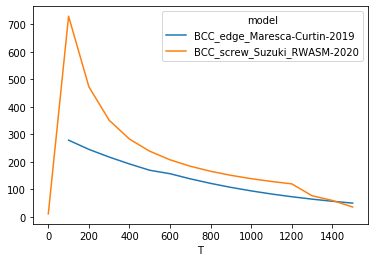

In [258]:
single_calc.pretty_calc_data[mask].pivot(index='T', columns='model', values='tau_y').plot()

In [263]:
# compare M-C's screw and Suzuki's screw models
# TiNbZr
# lack of elemental data for TiNbZr in M-C's screw model 
# treat TiNbZr as average alloy
comp_example7 = {'TiNbZr':100}
single_calc.set_comp(comp_example7)
# use M-C's screw model 
single_calc.use_model('BCC_screw_Maresca-Curtin-2019')
# get adjustables and data
single_calc.set_adjustables()
single_calc.grab_data(filein)
# calculate
single_calc.calculate()

Alloy system: TiNbZr: 1.0 
BCC_screw_Maresca-Curtin-2019 exists.
Currently using model(s): ['FCC_Varvenne-Curtin-2016', 'BCC_screw_Suzuki_RWASM-2020', 'BCC_screw_Maresca-Curtin-2019']
Setting adjustable parameters of the model FCC_Varvenne-Curtin-2016.
{'f1': 0.35, 'f2': 5.7, 'alpha': 0.123}
Setting adjustable parameters of the model BCC_screw_Maresca-Curtin-2019.
{'kink_width': 10, 'Delta_V_p_scaler': 1, 'Delta_E_p_scaler': 1}
Setting adjustable parameters of the model BCC_screw_Suzuki_RWASM-2020.
{'kink_width': 10, 'tau_i_exponent': 1, 'dislocation_density': 40000000000000.0, 'trial_kappa': {'min': 1, 'max': 4, 'inc': 0.5}, 'trial_tau_k': 5}
grab elemental data for prediction.
reading datafile ../sspredict/sample_elements_data.json.
Setting elemental data of the model FCC_Varvenne-Curtin-2016.
Failed to fetch data for ['TiNbZr']
Make sure data file contains: 
1. "structure", 
2. "Vn" or "a" or "b",  
 3. "E" "G" "nu"  
 
Setting elemental data of the model BCC_screw_Maresca-Curtin-20

In [269]:
single_calc.reorganize_data()
mask2 = single_calc.pretty_calc_data['TiNbZr']==100
single_calc.pretty_calc_data[mask2]

,Co,Fe,Ni,Mn,Mo,W,Nb,Zr,Ti,TiNbZr,T_liquidus,jog_activated,T,tau_y,structure,model
65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,100.0,440.58,bcc,BCC_screw_Maresca-Curtin-2019
66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,200.0,352.32,bcc,BCC_screw_Maresca-Curtin-2019
67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,300.0,278.30,bcc,BCC_screw_Maresca-Curtin-2019
68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,400.0,232.31,bcc,BCC_screw_Maresca-Curtin-2019
69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,500.0,217.00,bcc,BCC_screw_Maresca-Curtin-2019
70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,600.0,202.69,bcc,BCC_screw_Maresca-Curtin-2019
71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,700.0,189.15,bcc,BCC_screw_Maresca-Curtin-2019
72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,800.0,176.24,bcc,BCC_screw_Maresca-Curtin-2019
73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,900.0,163.86,bcc,BCC_screw_Maresca-Curtin-2019
74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,1000.0,151.94,bcc,BCC_screw_Maresca-Curtin-2019


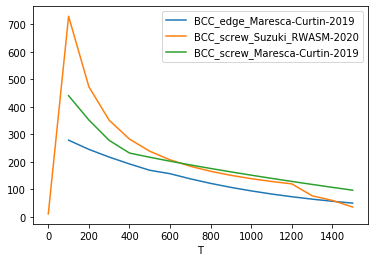

In [274]:
single_calc.pretty_calc_data[mask].pivot(index='T', columns='model', values='tau_y').plot()
plt.plot(single_calc.pretty_calc_data[mask2]['T'],single_calc.pretty_calc_data[mask2]['tau_y'],label='BCC_screw_Maresca-Curtin-2019')
plt.legend()

In [278]:
single_calc.all_elements

['Co', 'Fe', 'Ni', 'Mn', 'Mo', 'W', 'Nb', 'Zr', 'Ti', 'TiNbZr']